# Homework 6

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

**Note:** In **all** problems below, round all floats in your answers to **3** decimal places.

## Part I: Abalone

### Problem 1 (5 pts)

We'll begin by exploring a set of data about [abalone](https://en.wikipedia.org/wiki/Abalone). This contains physical measurements
of abalone, a type of marine snail. Information about each feature in the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/abalone) under **Attribute Information**.

(a) Load `abalone_original.csv` using `pandas` into a variable called `abalone_df`. 

(b) Print out the statistics of the numeric variables in the dataset using `describe()`. Consider the summary statistics of the `height` variable. Does anything stick out to you?

### Problem 2 (3pts)

Show the rows of the `abalone_df` dataset that cause the oddity in Problem 1.

Modify `abalone_df` directly, removing these rows from the dataset. Print the numer of rows in the modified dataset. *Confidence check*: there should be 4175 rows in the resulting dataset.

### Problem 3 (10pts)

Next, we'll explore the relationship between individual abalone dimensions and the creature's shucked weight.

(a) Using the updated `abalone_df`, make three scatterplots to examine the relationships between:

1. `x = length, y = shucked-weight`
2. `x = diameter, y = shucked-weight`
3. `x = height, y = sucked-weight`

with the hue of each point representing the `sex` of the abalone.

(b) For each of the pairs above, do you expect a linear model to fit the relationship well?

(c) Do you notice any relationships between `sex` and the variables above? Why might these relationships make sense?

### Problem 4 (15pts)

(a) Remove the two obvious `height` outliers in the dataset and assign the resulting dataframe to a new variable, `cleaned_df`.

(b) For each of the three input variables above, use a variable transformation to fit an exponential model ($y = ce^{\lambda x}$) as a linear relationship between the input variable and the appropriately transformed version of `shucked-weight`.

(c) Print the intercept, coefficient, and $r^2$ (rounded to 3 decimal places) of each of your 3 models. Think: how should you calculate $r^2$ in this case?

(d) For each input variable, create a plot showing the original data and the predictions of your model from part (b) over the `cleaned_df` data. How would you describe the fit? Would you expect the model to over- or under-predict the weight of the large-height outliers you removed in step (a)?

### Problem 5 (15pts)

Here we will use [SciPy's `curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to fit a different model for our abalone data.

(a) Define a function, `cubic`, that takes parameters `X, a` and returns $aX^3$.

(b) Use the `curve_fit` function to find the optimal parameters of a `cubic` model for each of  the same three pairs of variables as in problem 4, fitting on `cleaned_df`. Set the `bounds` parameter of `curve_fit` to force the coefficient `a` to be strictly positive.

(c) Plot the result of your regressions from part (b).

(d) Calculate the $r^2$ of each of the three models in the same way you did in problem 4. How do these compare to the $r^2$ of the exponential models from problem 4? Which model, exponential or cubic, is more appropriate to the underlying physical phenomenon (the relationship between organism size and weight)? Why?

## Part II: Cars

For our next problems, we will use the `auto-mpg` dataset. This describes the features
of several different car makes and models from the 1970s and early '80s. It's a classic data science example. 

First, we load the data:

In [2]:
auto_df = pd.read_csv('auto-mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

The data type of `horsepower` is `object` (rather than something numeric). Let's fix that:

In [4]:
# identify non-numeric-like values for horsepower
numeric_values = pd.DataFrame(auto_df.horsepower.str.isdigit())  
auto_df[numeric_values['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [5]:
# missing values are indicated by '?'; replace with nan and drop
auto_df = auto_df.replace('?', np.nan)
auto_df = auto_df.dropna()

# cast horsepower to type float
auto_df['horsepower'] = auto_df['horsepower'].astype('float64')

### Problem 6 (2pts)

Using the cleaned `auto_df`, create a scatterplot of`mpg` (y-axis) as a function of `horsepower` (x-axis). What relationship do you see? Is it linear?

### Problem 7 (5pts)

Using the `curve_fit` function, fit a quadratic (second order) polynomial function to the data from problem 6.

Plot your regression line on top of the data and print the $r^2$ (rounded to 3 decimal places).

Next, we'll look at a more complex model on the same data.

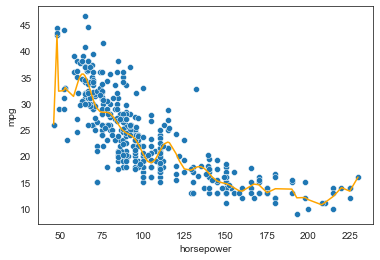

In [6]:
# polynomial model of degree 30 (yikes!)
model = np.polynomial.Polynomial.fit(auto_df['horsepower'], auto_df['mpg'], 30)

# plot output
sns.scatterplot(data=auto_df, x='horsepower', y='mpg')
horsepower_sorted = auto_df['horsepower'].sort_values()
plt.plot(horsepower_sorted, model(horsepower_sorted), c='orange')
plt.show()

In [7]:
print(f'r^2: {np.corrcoef(model(auto_df["horsepower"]), auto_df["mpg"])[0, 1] ** 2:.3f}')

r^2: 0.736


### Problem 8 (5pts)

Above is a degree-30 polynomial fit of the same dataset. How does this fit compare to the quadratic polynomial model? Would you expect this to be a better or worse predictor of `mpg` values than the quadratic model? Are there any potential issues with the quadratic model?